In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests
# requests.get('URL 주소') 함수를 이용해서 원하는 페이지의 소스 코드를 불러온다.
requests.get('https://www.naver.com')

<Response [200]>


<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정보
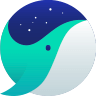
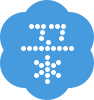

In [65]:
# 위에서 Response [200]라고 출력이 되면 올바르게 페이지를 불러왔음을 알 수 있다.
r = requests.get('https://www.naver.com')
print(r.text)

### Beautiful Soup
- Beautiful Soup는 소스 코드를 파싱하는데에 사용하는 라이브러리이다.
    - 파싱을 한다는 것, 그 중에서도 HTML 소스 코드를 파싱한다는 것은 HTML 문법을 분석한다는 것이다.   
1. ```.find```    / ```.find_all```
- 태그명과 속성 정보로 매치되는 것을 한개 / 모두 찾을 때
2. ```.text```
- 태그의 텍스트를 출력할 때
3. ```.get```
- 태그의 속성 정보를 가져올 때

In [10]:
soup = BeautifulSoup(r.text, 'html')
# BeautifulSoup(분석할 HTML 소스 코드, parser의 유형 지정)
soup.find('meta', attrs = {'property':'og:title'})


<meta content="네이버" property="og:title"/>

In [60]:
from bs4 import BeautifulSoup as bs
import requests

baseUrl = 'https://www.google.com/search?q=%EA%B9%80%EC%9C%A0%EC%A0%95&sxsrf=ALeKk03FFLEyBUmPPsJYwr-V29S7zBLCDQ:1612794672738&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiX98CswNruAhVEUd4KHW10Ay0Q_AUoAXoECAUQAw&biw=642&bih=706'
r = requests.get(baseUrl)
crawl_num = int(input('크롤링할 이미지의 개수 입력 : (최대 20개)'))


soup = bs(r.text, "html.parser")
img = soup.find_all('img', {'class' : 't0fcAb'})


크롤링할 이미지의 개수 입력 : (최대 20개)10


In [61]:
img, len(img)

([<img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwMUQVW_MEyCFpa8XoFEqc3jzh-KKOgL31Yue0ILSJ3OhNNAX6QhYxpm2krIQ&amp;s"/>,
  <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQS6zVrVud4cscmeHJzDysGbDyn9EXDYapxdta0V_G9Xvh-44wIalWQp9hHg&amp;s"/>,
  <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvq4nut5W7Ik_jN7R181iKDQY22IiFuhyvoxy2_L8Q5YWEhgvetK8whFl7hls&amp;s"/>,
  <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMb5xrALhRyJ-6IOqT2UU8ae7tFUi45s9bOcusFYlnZ9BF6tP1a7rCaOYrsw&amp;s"/>,
  <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCz35dnGh8KE6V88Jj99d5hxYIB6nWqJjM5F7oUIm-UQc_lZPP4iXqI3oApA&amp;s"/>,
  <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrKwzU7T3q7CA6xPgSC4H6au2OdHtBNgW343bcePidmZTu0gwnQ6QWOVhfvIk&amp;s"/>,
  <img alt="" class="t0fcAb" src="https://e

In [62]:
idx = 1
for i in img:
    print(idx)
    imgUrl = i['src']
    print(imgUrl)
    r = requests.get(imgUrl)
    file = open('김유정'+str(idx) + '.jpg', 'wb')
    # 이렇게 하면 파이썬 코드가 저장된 위치에 '김유정 1.jpg'이런 식으로 크롤링한 이미지가 저장이 된다.
    # 만약에 저장소를 따로 지정해 주고 싶다면 직접 폴더를 생성해서 지정해 주는 과정이 필요하다.
    
    file.write(r.content)
    file.close()
    idx += 1
    if idx > crawl_num:
        break
print('Image Crawling Completed')

1
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwMUQVW_MEyCFpa8XoFEqc3jzh-KKOgL31Yue0ILSJ3OhNNAX6QhYxpm2krIQ&s
2
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQS6zVrVud4cscmeHJzDysGbDyn9EXDYapxdta0V_G9Xvh-44wIalWQp9hHg&s
3
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvq4nut5W7Ik_jN7R181iKDQY22IiFuhyvoxy2_L8Q5YWEhgvetK8whFl7hls&s
4
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMb5xrALhRyJ-6IOqT2UU8ae7tFUi45s9bOcusFYlnZ9BF6tP1a7rCaOYrsw&s
5
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCz35dnGh8KE6V88Jj99d5hxYIB6nWqJjM5F7oUIm-UQc_lZPP4iXqI3oApA&s
6
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrKwzU7T3q7CA6xPgSC4H6au2OdHtBNgW343bcePidmZTu0gwnQ6QWOVhfvIk&s
7
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQ6ZRN49lo9yKwG2Tj1Wb29QMAN3WGNYJ9QAOiyfjXc1xx4WKUJ8DNfxZ0D9I&s
8
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoFLJ2qDNw4OLuipTZpSg4FQJPrmY2gfsP1T4ptTNUO9KNAywLCXGhNyRpO2I&s
9
https://encrypted-tbn0.gstatic.com/images

- 이렇게 Crawling을 진행 할 때에는 각 HTML소스 코드에서 원하는 데이터를 적절하게, 모두 추출해 내기 위해서 공통 규칙을 찾아 **반복문**을 잘 이용해서 다운받아 사용할 수 있어야 한다.

### Selenium
- 웹 어플리케이션을 테스트 하기 위해 고안된 framework로, 크롤링을 이용해서 **웹을 동작**시키는데에 매우 유용하다.
1. 로그인을 해야 하는 경우
2. 웹을 동작시켜야만 원하는 정보가 나오는 경우
    - 마우스 오버를 해야 가격이 나오는 경우
    - 스크롤 다운을 해야만 정보가 나오는 경우
    
#### Selenium에서 자주 사용하는 함수
1. ```.get(URL)``` 
- 웹 페이지로 이동
2. ```.find_element_by ~ ```
- 웹 요소를 찾음
3. ```click()```
- 찾은 웹 요소를 클릭
4. ```send_keys(key)```
- 찾은 웹 요소에 정보를 보냄
5. ```page_source```
- html 소스 코드를 가지고 옴

- 단, Selenium은 request나 BeautifulSoup에 비해서 반복문을 이용한 crawling 작업이 길어질수록 속도가 느려지기 때문에 필요에 따라 적당히 섞어 사용해야 한다.

In [66]:
from selenium import webdriver

In [110]:
driver = webdriver.Chrome(executable_path = "C:\\Users\\JIHELEE\\Downloads\\chromedriver_win32\\chromedriver.exe")

In [111]:
driver.get('https://accounts.google.com/signin/v2/identifier?service=accountsettings&continue=https%3A%2F%2Fmyaccount.google.com%3Futm_source%3Daccount-marketing-page%26utm_medium%3Dgo-to-account-button&flowName=GlifWebSignIn&flowEntry=ServiceLogin')
driver.implicitly_wait(3)

In [ ]:
# 로그인을 하기 위해서 이메일이나 휴대전화 입력
# xpath를 이용해서 입력
# '//*[@id="view_container"]/div/div/div[2]/div/div[1]/div/form/span/section/div/div/div[1]/div/div[1]/div/div[1]/input'
driver.find_element_by_xpath('//*[@id="view_container"]/div/div/div[2]/div/div[1]/div/form/span/section/div/div/div[1]/div/div[1]/div/div[1]/input').send_keys('1109penguin@gmail.com')
driver.find_element_by_name('identifier').send_keys('1109penguin@gmail.com')

# click버튼을 xpath를 이용해서 찾은 뒤에 누를수 있게 한다.
# .find_element_by 함수를 주로 사용하게 된다.
driver.find_element_by_xpath('//*[@id="identifierNext"]/div/button/div[2]').click()

### 구글 로그인의 경우에는 안전하게 로그인을 Selenium으로 할수 없는 관계로 이어서 Instargram 로그인 및 자동 스크롤링을 적용해 보고자 한다.

In [115]:
# 인스타그램의 url을 이용해서 인스타그램 웹사이트를 작동시키기 위해
# 새롭게 chrome driver을 만들어 준다.

from selenium import webdriver
import time

# 본인의 경로 설정해서 붙여두기
# mac의 경우 확장자 (.exe)없이 불러오기
# driver = webdriver.Chrome(executable_path='/경로/chromedriver.exe')
driver = webdriver.Chrome(executable_path="C:\\Users\\JIHELEE\\Downloads\\chromedriver_win32\\chromedriver.exe")

import requests 
from bs4 import BeautifulSoup

#인스타그램 크롤링
#-----
#인스타그램 해시태그를 통해 검색한 내용을 크롤링 해봅니다.

# 인스타그램 url 불러오기
driver.get('https://www.instagram.com/')

In [104]:
#ID와 비밀번호 입력//*[@id="loginForm"]/div/div[1]/div/label/input
# 마우스 우측 버튼을 누르면 copy xpath기능을 이용해서 아래의 xpath를 사용할 수 있다

driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input').send_keys('167.ixxi')
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input').send_keys('Ewha2071040')
                                                                                

# 로그인 클릭
#//*[@id="loginForm"]/div/div[3]/button/div
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]/button/div').click()

In [106]:

# 알림설정 (나중에 하기)
driver.find_element_by_xpath('/html/body/div[4]/div/div/div/div[3]/button[2]').click()

In [108]:
# 본인이 원하는 해시태그 검색
driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input').send_keys('서촌 채식주의자')

# 검색된 해시태그 클릭
driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a').click()

# 자동 스크롤러 만들기 

from selenium.webdriver.common.keys import Keys

page_scroll = 0

while page_scroll < 20:
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    page_scroll += 1

# xpath_list 만들기

# //*[@id="react-root"]/section/main/article/div[2]/div/div[1]/div[1]/a
# //*[@id="react-root"]/section/main/article/div[2]/div/div[1]/div[2]/a
# //*[@id="react-root"]/section/main/article/div[2]/div/div[1]/div[3]/a
# //*[@id="react-root"]/section/main/article/div[2]/div/div[2]/div[1]/a

xpath_list = []

for i in range(1, 11):
    for k in range(1, 4):
        xpath = '//*[@id="react-root"]/section/main/article/div[2]/div/div['+str(i)+']/div['+str(k)+']/a'
        xpath_list.append(xpath)

xpath_list

# 인스타 게시물 URL 수집 (get_attribute)

url_list = []

for i in range(len(xpath_list)):
    url = driver.find_element_by_xpath(xpath_list[i]).get_attribute('href')
    url_list.append(url)
    
len(url_list)

# url_list 불러오기
driver.get(url_list[1])

# BeautifulSoup으로 파싱

html = driver.page_source
soup = BeautifulSoup(html, 'html')

soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("a")[0].text
# 첫번째 인스타그램 사용자 아이디

soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all('div')[-1].text

soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("span")[1].text

soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("span")[1].find_all("a")[1].text

# 일산맛집 태그로 찾아본 결과
from tqdm import tqdm
import random

driver.get('https://www.instagram.com/explore/tags/%EB%B0%A9%EC%96%B4%EB%A7%9B%EC%A7%91/')

result_list = []
page_scroll = 0

# 자동 스크롤러로 xpath를 확인할 수 있게 함
while page_scroll < 20:
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    page_scroll += 1

# 크롤링 코드    
for k in tqdm(range(0, 30)):
    driver.get(url_list[k])
    time.sleep(random.uniform(1, 3))

    source = driver.page_source
    
    soup = BeautifulSoup(source, 'html.parser')
    
    try:
        # 작성자ID
        username = soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("a")[0].text
        
        # 작성 시간
        report_time = soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("div")[2].text

        # 작성 내용 (해시태그 포함된 코드)
        main = soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("span")[1].text
        
        # 해시태그 (시간 상 3개만 실습해봅시다!)
        hashtag_1 = soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("span")[1].find_all("a")[0].text
        hashtag_2 = soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("span")[1].find_all("a")[1].text
        hashtag_3 = soup.find_all("div", attrs = {"class":"C4VMK"})[0].find_all("span")[1].find_all("a")[2].text

        # 이미지 파일 난이도가 조금 있다고 판단하여 개인실습으로 대체하겠습니다! 
        # https://kimflstudio.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B8%EC%8A%A4%ED%83%80%EA%B7%B8%EB%9E%A8-%ED%81%AC%EB%A1%A4%EB%A7%81-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C-beautifulsoup-selenium-%EC%82%AC%EC%9A%A9%EB%B2%95

    except: # 게시글이 삭제되었을 경우 공란으로 처리
        username = ''
        report_time = ''
        main = ''
        hashtag_1 = ''
        hashtag_2 = ''
        hashtag_3 = ''
        continue
        
    result = username, report_time, main, hashtag_1, hashtag_2, hashtag_3
    result_list.append(result)

# 수집된 데이터 확인
import pandas as pd
df_insta = pd.DataFrame(result_list, columns = ['ID', '작성시간', '내용', '해시태그1', '해시태그2', '해시태그3'])
df_insta

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:52<00:00,  3.76s/it]


,ID,작성시간,내용,해시태그1,해시태그2,해시태그3
0,seochon_archive,36주,🥗채식주의자..비트 퀴노아 허무스김밥비건 라...,#채식주의자,#서촌,#서촌맛집
1,syl81020,32주,이거요리가딱서빙되는순간바다다라고🐬🐳🐠🐙🏖외침라자냐가심하게자꾸업글업글된다ㅋ😁👍💕다그런...,#일상,#데일리,#서촌채식주의자
2,syl81020,32주,ㅋㅋ우리가넘일찍왔나보다사장님좀있음영혼탈탈털리실분위기조성중이상하게조용하다가우리오면그런...,#일상,#데일리,#서촌채식주의자
3,grace_vege,33주,#비트후무스퀴노아김밥 👍 #BeetQuinoaHummusSus...,#비트후무스퀴노아김밥,#BeetQuinoaHummusSushiRolls,@vegan_seochon
4,bamto.ri__,33주,#채식주의자 #토리_서촌오래동안 와보고싶었ᄃ...,#채식주의자,#토리_서촌,#비트퀴노아후무스김밥
5,syl81020,33주,울사장님손대중레시피가아주제대로였던후무스김밥😁😋😉브레이크타임이주말엔없어진줄몰랐는데암튼...,#일상,#데일리,#사장님재난지원금나온김에미용실좀다녀오셨길
6,vegan_seochon,34주,🏄🏻‍♀️🐧🐧오늘 디저트가 준비되있지 않습니다....,#채식주의자,#서촌채식주의자,#비건카페
7,slow.slower,34주,#채식주의자⠀비건 카페 겸 레스토랑⠀고기로는 절대 낼 수 없는 다채로운 맛😌⠀고소하...,#채식주의자,#비건카페,#비건레스토랑
8,vegan_ming,36주,#나의비거니즘일기 #채식주의자⠀📍서촌 채식ᄌ...,#나의비거니즘일기,#채식주의자,@gandanmaan
9,vegan_seochon,36주,파인애플 무스케이크. 꽃씨 심어서 오늘 처ᄋ...,#palmoilfree,#채식주의자,#서촌채식주의자


꼭 알아두어야 할 내용
-----
1. 크롤링에는 대표적으로 두 가지 (Selenium과 BeautifulSoup)라는 라이브러리를 사용한다.

2. Selenium은 웹을 동작시키는 데, BeautifulSoup은 html 정보를 파싱하는 데 활용한다.

3. Selenium은 동적 크롤링을 효과적으로 수행할 수 있지만 라이브러리 자체가 무겁고, 자주 막히기 때문에 Requests와 BeautifulSoup으로 해결이 가능하다면 최대한 해결해보자.

3. BeautifulSoup에서는 `soup = BeautifulSoup(html,'lxml')`을 설정한다.

4. `soup.find_all(<b>'태그'</b>, attrs = {<b>'속성'</b> : <b>'속성 정보'</b>})`의 구조로 검색한다. (soup.find()의 경우도 동일)

5. soup.find_all()의 경우에는 리스트 형태로 결괏값을 반환하기 때문에 인덱싱을 해주어야 다른 함수들을 활용할 수 있다.(.text, .get 등)

6. 부모 태그를 가지고 온 경우에 더 파싱이 가능하다. ex) `soup.find(<b>'부모 태그'</b>).find(<b>'자식 태그'</b>)` (실제 본인이 원하는 데이터를 얻고자 할 때 html 구조에서 헤매는 경우를 해결해 줄 수 있다.)

6. Selenium으로 페이지의 html 정보를 가지고 오는 경우 `driver.page_source`

7. Selenium으로 웹을 동작시킬 때는 `driver.find_element_by_xpath(<b>'복사한 xpath'</b>)`를 활용한다. 대표적으로 .click(), .send_keys() 등이 있다.

8. 스크립트를 실행하고 싶을 때는 `driver.execute_script(<b>'원하는 명령어'</b>)`를 활용할 수 있다.

9. URL이나 xpath를 활용하는 경우에는 규칙을 찾아서 만들어두는 것이 작업 속도를 훨씬 높여준다.

10. 좀 더 수준높은 크롤링을 해보고 싶다면 구글링을 해보자. (BeautifulSoup, Selenium의 딱딱한 형식을 따르지 않고도 빠르고 가볍게 만든 크롤러들을 참고해보자!, 방식도 굉장히 다양하다) 